In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from VertexTissue.Sweep import sweep
from VertexTissue.Dict import  dict_product, last_dict_key, last_dict_value, take_dicts, dict_mask

from Step2_bis import angle_timeseries, depth_timeline, extension_timeseries, final_arc_ratio, final_cone_slope, final_depth, final_inter_arc_distance, final_width, inter_arc_distance_timeline, intercalations, run, phi0s, phi0_SLS,  base_path, kws_baseline,   final_angle, L0_T1s, final_inter_arc_depth, final_lumen_depth
from Step2_bis import naught_middle_remodel, naught_outer_remodel, naught_double_remodel, extension_timeline

from Step2_bis import kws_strong_pit_middle, kws_strong_pit_double, kws_strong_pit_outer, kws_strong_pit_baseline, kws_middle, kws_double, kws_outer, kws_middle_basal, kws_middle_basal_hi, kws_middle_fine, kws_middle_no_scale, kws_baseline_no_scale, kws_outer_no_scale, kws_middle_smolpit, kws_outer_smolpit, kws_baseline_smolpit
from Step2_bis import clinton_baseline, clinton_double, clinton_outer, clinton_middle, kws_baseline_thresh, kws_baseline_thresh_extend, kws_baseline_thresh_sym, ecs, kws_baseline_thresh_no_scale, kws_baseline_thresh_no_scale_extend, kws_baseline_thresh_no_scale_sym
from Step2_bis import kws_baseline_thresh_no_scale_no_T1, kws_baseline_thresh_no_scale_no_T1_extend, kws_baseline_thresh_no_scale_no_T1_sym, kws_baseline_thresh_no_scale_no_T1_edge, kws_baseline_thresh_no_scale_no_T1_extend_edge, kws_baseline_thresh_no_scale_no_T1_sym_edge, kws_SLS_baseline_thresh,  kws_SLS_baseline_thresh_ext,  kws_SLS_baseline_thresh_con

from VertexTissue.Plotting import pcolor, contour, hatched_contour, add_color_bar_to_right


kws_contract = kws_SLS_baseline_thresh_con
kws_extend = kws_SLS_baseline_thresh_ext
kws_sym = kws_SLS_baseline_thresh

phi0s=phi0_SLS


##################################################################
###################### INVAGINATION DEPTH ########################
##################################################################

depth_func = final_depth
refresh=False

depth_baseline  = sweep(phi0s, run, kw=kws_contract, pre_process = depth_func,
cache=True, savepath_prefix=base_path, inpaint=np.nan, refresh=refresh, dtype=float)

depth_extend  = sweep(phi0s, run, kw=kws_extend, pre_process = depth_func,
cache=True, savepath_prefix=base_path, inpaint=np.nan, refresh=refresh, dtype=float)

depth_sym  = sweep(phi0s, run, kw=kws_sym, pre_process = depth_func,
cache=True, savepath_prefix=base_path, inpaint=np.nan, refresh=refresh, dtype=float)

Apical nodes added correctly.
Number of apical nodes are 421
Basal Nodes Added
Vertical Connections made


In [2]:
pwd()

'/mnt/xubuntu/home/lmackay/git/3d-vertex/Validation/Viscoelastic/Step2'

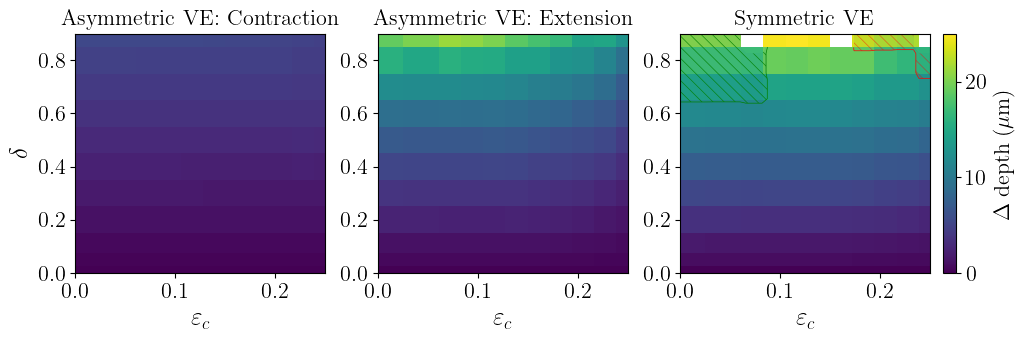

In [26]:

##################################################################
##################### DELTA DEPTH HEATMAP ########################
##################################################################

fig, axs = plt.subplots(1,3)
fig.set_size_inches(9.5, 3.5)
# plt.get_current_fig_manager().canvas.set_window_title('Middle')
axs=axs.ravel()
# for i in range(mid.shape[-1]):
        # plt.sca(axs[i])
plt.get_current_fig_manager().set_window_title('Depth (Basal)')
import matplotlib as mpl
cmap = mpl.colors.Colormap('viridis')
depths= (depth_baseline, depth_extend, depth_sym)
vmax = max(*[np.nanmax(d) for d in depths])-depth_baseline[0,0]
plt.sca(axs[0])
plt.ylabel('$\delta$')
for d, ax, title in zip(depths, axs,
                    ('Asymmetric VE: Contraction','Asymmetric VE: Extension', 'Symmetric VE')):
    plt.sca(ax)
    pcolor( ecs, 1-phi0s, d-depth_baseline[0,0], vmin=0, vmax=vmax)
    # ax.tick_params(labelsize = tick_style['fontsize'])
    ax.set_title(title,usetex=True, fontsize=16) 
    plt.xlabel(r'$\varepsilon_c$')

plt.tight_layout()
# pcolor( ecs, 1-phi0s, 50*(depth_sym-(depth_baseline+depth_extend-2*depth_baseline[0,0])-depth_baseline[0,0])/(depth_baseline[0,0]), vmin=0, vmax=vmax)
cb_ax=add_color_bar_to_right(axs[-1], label=r'$\Delta\;\rm{depth}\;(\mu \rm{m})$')
cb_ax.yaxis.label.set_size(16)
plt.sca(axs[-1])
hatched_contour( ecs, 1-phi0s, (depth_sym-(depth_baseline+depth_extend-2*depth_baseline[0,0])-depth_baseline[0,0])/(depth_baseline[0,0]), upscale=4, levels=[ .05,25], alpha=0.1, hatch_alpha=.5)
hatched_contour( ecs, 1-phi0s, -(depth_sym-(depth_baseline+depth_extend-2*depth_baseline[0,0])-depth_baseline[0,0])/(depth_baseline[0,0]), upscale=4, levels=[ .05,25], alpha=0.1, hatch_alpha=.85, color='g')

plt.show()
# fig.savefig('invagination_depth_VE.pdf', bbox_extra_artists=[cb_ax], bbox_inches='tight')
#fig.savefig('invagination_depth_VE.png', dpi=200)

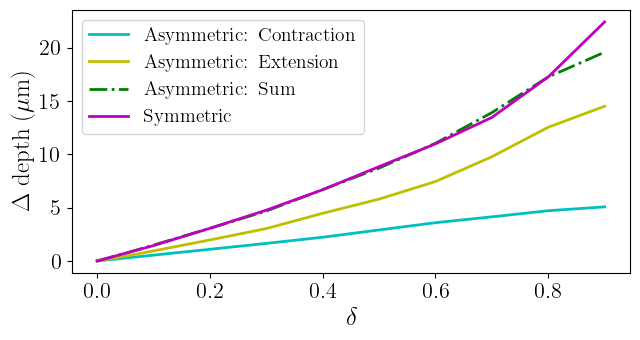

In [27]:
##################################################################
##################### DELTA DEPTH SLICE ########################
##################################################################


fig=plt.figure()
fig.set_size_inches(6.5, 3.5)
slice=8
plt.plot(1-phi0s, depth_baseline[:,slice]-depth_baseline[0,0], color='c', label='Asymmetric: Contraction',linewidth=2)
# plt.plot(phi0s, depth_baseline_edge[:,slice]-depth_baseline_edge[0,0], color='c', linestyle=':', label='Asymmetric: Contraction',linewidth=2)
plt.plot(1-phi0s, depth_extend[:,slice]-depth_baseline[0,0], color='y',linewidth=2, label='Asymmetric: Extension')
# plt.plot(phi0s, depth_extend_edge[:,slice]-depth_baseline_edge[0,0], color='y',linewidth=2, linestyle=':', label='Asymmetric: Extension')
plt.plot(1-phi0s, depth_extend[:,slice]+depth_baseline[:,slice]-2*depth_baseline[0,0], color='g', linestyle='-.',linewidth=2, label='Asymmetric: Sum')
# plt.plot(phi0s, depth_extend_edge[:,slice]+depth_baseline_edge[:,slice]-2*depth_baseline_edge[0,0], color='g', linestyle=':',linewidth=2, label='Asymmetric: Sum')
plt.plot(1-phi0s, depth_sym[:,slice]-depth_baseline[0,0], color='m',linewidth=2, label='Symmetric')
# plt.plot(phi0s, depth_sym_edge[:,slice]-depth_baseline_edge[0,0], color='m',linewidth=2, linestyle=':', label='Symmetric')
plt.legend(loc='upper left')
plt.ylabel(r'$\Delta\;\rm{depth}\;(\mu \rm{m})$')
plt.xlabel('$\delta$')
plt.tight_layout()   
# plt.savefig('asymmetric_vs_symmetric_depth_change.pdf')
# plt.savefig('asymmetric_vs_symmetric_depth_change.png', dpi=200)



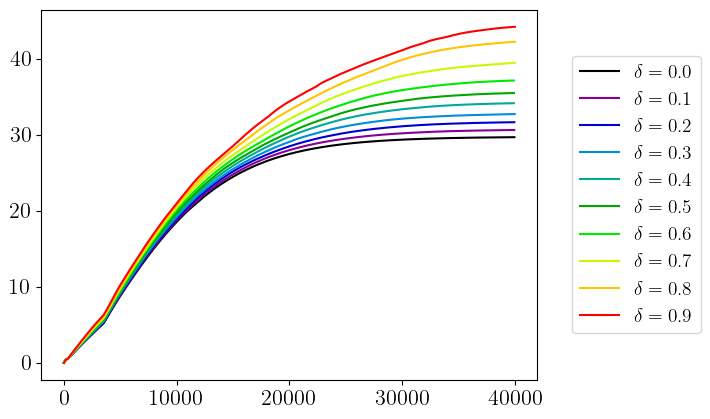

In [45]:

refresh=False

depth_timeline_sym = sweep(phi0s, run, kw=kws_sym, pre_process = depth_timeline,
cache=True, savepath_prefix=base_path, inpaint=np.nan, refresh=refresh, dtype=float)



depth_timeline_ext = sweep(phi0s, run, kw=kws_extend, pre_process = depth_timeline,
cache=True, savepath_prefix=base_path, inpaint=np.nan, refresh=refresh, dtype=float)


depth_timeline_con = sweep(phi0s, run, kw=kws_contract, pre_process = depth_timeline,
cache=True, savepath_prefix=base_path, inpaint=np.nan, refresh=refresh, dtype=float)


### TIMESERIES
N=0
for ts, phi0 in zip(depth_timeline_ext[:, slice], phi0s):
        if ts is not None and (np.mod(phi0,0.1)<0.01 or np.mod(phi0,0.1)>0.05):
                N+=1

colors = plt.cm.nipy_spectral(np.linspace(0,.85,N))
plt.figure()
i=0
for ts, phi0 in zip(depth_timeline_ext[:, slice], phi0s):
        if ts is not None and (np.mod(phi0,0.1)<0.01 or np.mod(phi0,0.1)>0.05):
                plt.plot(ts[:,0], ts[:,1],label=f'$\delta = {round(1-phi0,2)}$', color=colors[i])
                i+=1

plt.legend(bbox_to_anchor=(1.05, 0.5),loc='center left')
plt.show()
